In [548]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.formula.api as smf

# Data loading

## Movie data

movie.metadata.tsv.gz [3.4 M]
Metadata for 81,741 movies, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:
- Wikipedia movie ID
- Freebase movie ID
- Movie name
- Movie release date
- Movie box office revenue
- Movie runtime
- Movie languages (Freebase ID:name tuples)
- Movie countries (Freebase ID:name tuples)
- Movie genres (Freebase ID:name tuples)

In [549]:
# Load films
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
#movies['runtime'].hist()


(81741, 9)


In [550]:
movies.head(5)

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [551]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


## Character data

character.metadata.tsv.gz [14 M]
Metadata for 450,669 characters aligned to the movies above, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:

- Wikipedia movie ID
- Freebase movie ID
- Movie release date
- Character name
- Actor date of birth
- Actor gender
- Actor height (in meters)
- Actor ethnicity (Freebase ID)
- Actor name
- Actor age at movie release
- Freebase character/actor map ID
- Freebase character ID
- Freebase actor ID

In [552]:
# Load characters
characters_header = ['wikipedia_movie_id','freebase_movie_id','movie_release_date','character_name','actor_birthdate','actor_gender','actor_height_meters','actor_ethnicity_freebase_id','actor_name','actor_age_at_movie_release','freebase_character_actor_map_id','freebase_character_id','freebase_actor_id']
characters = pd.read_csv('data/character.metadata.tsv', sep='\t', header=None, names=characters_header)
characters.sample(5)

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_birthdate,actor_gender,actor_height_meters,actor_ethnicity_freebase_id,actor_name,actor_age_at_movie_release,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
121419,27484917,/m/0c009_h,2010-05-27,Talwar,NaN,M,NaN,NaN,Shawar Ali,NaN,/m/0h8jf92,/m/0h8jf94,/m/09gntfv
355642,10688272,/m/02qmbht,1975-02-08,Hu Chin,1944,M,NaN,NaN,Lung Chiang,31.0,/m/0jp368s,/m/0jp368w,/m/0jp3692
243321,25947669,/m/0gg5vgs,2009-09-09,NaN,1956-06-25,F,NaN,NaN,Chloe Webb,53.0,/m/0gvxlnv,NaN,/m/01ndjq
275480,3836795,/m/0b2jrl,1923-03-27,Lady Jane,1895-07-23,F,1.63,NaN,Aileen Pringle,NaN,/m/05cchly,/m/0cgxlbj,/m/0857rd
265113,2573149,/m/07ny8x,1990,NaN,1957-05-05,M,1.88,/m/02w7gg,Richard E. Grant,32.0,/m/0gcgwyn,NaN,/m/01sp81


freebase_character_actor_map_id ?
movies are referred to by wikipedia id or freebase id
lots of data missing especially for: ethnicity, charcter name (maybe some characters aren't named in movies) , 
different date formats for release date 

## IMDB top 1000 data

This dataset includes IMDB top 1,000 movies of all time with attributes such as Title, Certificate, Duration, Genre, etc.
source: https://www.kaggle.com/datasets/omarhanyy/imdb-top-1000

- Poster_Link
- Series_Title: Title of movie
- Release_year: Movie release year
- Certificate
- Runtime [min]
- Genre
- IMDB_Rating: IMDB rating over 10
- Overview: brief summary
- Meta_score: rating by critiques
- Director
- Star 1, 2, 3, 4
- No_of_Votes: Number of votes
- Gross: Revenue in the first 5 days of release

In [553]:
imdb_top_1000 = pd.read_csv('data/imdb/imdb_top_1000.csv', thousands=',')

In [554]:
imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


## IMDB budget data:

This dataset includes the ratings for 3828 IMDB movies. 
source: ????

- Movie:  Title of movie
- Year: Movie release year
- IMDb: IMDB rating over 10
- Rating: Certificate
- Runtime [min]
- Genre
- Release Date: Movie release date
- Production Budget: Budget spent for production of the movie
- Domestic Gross: Gross revenue during first 5 days of release
- Worldwide Gross: Gross revenue overall

In [555]:
imdb_budget = pd.read_csv('data/imdb/IMDb_budgets.csv')

In [556]:
imdb_budget.sample(5)

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
2576,Jennifer's Body,2009,5.2,R,102,"Comedy, Horror","Sep 18, 2009",16000000,16204793,31943401
3189,Once Upon a Time in America,1984,8.4,R,229,"Crime, Drama","Jun 1, 1984",30000000,5321508,5575648
668,Elysium,2013,6.6,R,109,"Action, Drama, Sci-Fi","Aug 9, 2013",120000000,93050117,286192091
2615,Drowning Mona,2000,5.7,PG-13,96,"Comedy, Crime, Mystery","Mar 3, 2000",16000000,15427192,15980376
847,Contagion,2011,6.7,PG-13,106,"Action, Drama, Thriller","Sep 9, 2011",60000000,75658097,137551594


In [557]:
imdb_budget.describe()

,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross
count,3828.000000,3828.000000,3828.000000,3.828000e+03,3.828000e+03,3.828000e+03
mean,2003.594044,6.459013,109.940439,4.030960e+07,5.559021e+07,1.206910e+08
std,12.767740,0.996623,20.219674,4.480927e+07,7.403263e+07,1.993646e+08
min,1925.000000,1.500000,63.000000,7.000000e+03,0.000000e+00,0.000000e+00
25%,1999.000000,5.900000,96.000000,1.100000e+07,1.180967e+07,1.690363e+07
50%,2006.000000,6.500000,106.000000,2.500000e+07,3.225471e+07,5.077617e+07
75%,2013.000000,7.100000,120.000000,5.000000e+07,6.848642e+07,1.388776e+08
max,2020.000000,9.300000,271.000000,4.000000e+08,8.583730e+08,2.797801e+09


## Wikipedia

Wikipedia page access 
source: ???
    
- name: Title of movie
- data: ???
- pageviews: Number of connexion to page every ....????


In [558]:
wikipedia_pageviews = pd.read_csv('./handled_data/movies_wikipedia_pageviews.csv')

In [559]:
wikipedia_pageviews.head()

,movie_name,date,pageviews
0,Avengers: Endgame,2018042600,27
1,Avengers: Endgame,2018042700,115
2,Avengers: Endgame,2018042800,154
3,Avengers: Endgame,2018042900,141
4,Avengers: Endgame,2018043000,59


# Cleaning & Pre-processing of data

In [560]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [561]:
characters.describe()

,wikipedia_movie_id,actor_height_meters,actor_age_at_movie_release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [562]:
# Function to remove encoding: 
remove_encoding = lambda x: np.nan if x == '{}' else \
    [w.replace(' Language', '').replace(' language', '') for w in re.findall(r'"(.*?)"', x)[1::2]]

In [563]:
movies['genres'] = movies['genres'].apply(remove_encoding)
movies['languages'] = movies['languages'].apply(remove_encoding)
movies['countries'] = movies['countries'].apply(remove_encoding)
movies.head()

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama]


In [564]:
movies['countries'].apply(np.shape).min()

()

### Clean release dates

In [565]:
# Replace string 'release_date' column with 3 float columns ['release_year','release_month','release_day']

movies['release_date'] = movies['release_date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(movies['release_date'].str.split('-', expand=True).values, columns=['release_year','release_month','release_day']) # Split between days, months and year
movies[['release_year','release_month','release_day']] = release_date
movies = movies.drop('release_date', axis=1)


In [566]:
movies.head()

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year,release_month,release_day
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,08,24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,02,16
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]",1988,None,None
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,None,None
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],[Drama],1983,None,None


### Remove data that is out of this world 

In [567]:
def replace_outliers_with_nan(df, col, possible_range):
    df[col] = df[col].apply(lambda x: np.nan if x < possible_range[0] or x > possible_range[1] else x)

#### Movies

In [568]:
possible_movie_runtime_range = [0, 85 * 60] # 85 hours is the Guinness World Record for the longest movie - The Cure for Insomnia

In [569]:
replace_outliers_with_nan(movies, 'runtime', possible_movie_runtime_range)

In [570]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,61286.000000
mean,1.740784e+07,4.799363e+07,93.651871
std,1.098791e+07,1.121753e+08,51.513103
min,3.300000e+02,1.000000e+04,0.000000
25%,7.323695e+06,2.083193e+06,81.000000
50%,1.777899e+07,1.063969e+07,93.000000
75%,2.715573e+07,4.071696e+07,106.000000
max,3.750192e+07,2.782275e+09,5100.000000


In [571]:
movies[movies['runtime'] == 0]

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year,release_month,release_day
42478,786716,/m/03c6bq,Dickson Experimental Sound Film,NaN,0.0,[English],[United States of America],[Short Film],1894,None,None


The real length of Dickson Experimental Sound Film is 17 seconds which rounded to minutes is 0.

#### Characters

Remove age and height that are incorrect or corrupted

In [572]:
possible_age_range = (0, 150)
possible_height_range = (0, 3)

In [573]:
replace_outliers_with_nan(characters, 'actor_age_at_movie_release', possible_age_range)
replace_outliers_with_nan(characters, 'actor_height_meters', possible_height_range)

Add ethnicity labels using the freebase ethnicity ids

In [574]:
ethnicity_freebase_ids = pd.read_csv('handled_data/ethnicities_freebase_ids.csv', index_col=0)

In [575]:
def get_actor_ethnicity_label(row):
    try:
        ethnicity_label = ethnicity_freebase_ids.loc[row['actor_ethnicity_freebase_id'], 'ethnicity_label']
    except:
        ethnicity_label = np.NaN
    return ethnicity_label


In [576]:
characters['actor_ethnicity'] = characters.apply(lambda row: get_actor_ethnicity_label(row),axis=1)

In [577]:
characters

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_birthdate,actor_gender,actor_height_meters,actor_ethnicity_freebase_id,actor_name,actor_age_at_movie_release,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id,actor_ethnicity
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,unknown
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,English people
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN


In [578]:
characters.describe()

,wikipedia_movie_id,actor_height_meters,actor_age_at_movie_release
count,4.506690e+05,154809.000000,292175.000000
mean,1.396975e+07,1.748177,37.890901
std,1.079662e+07,0.106249,14.085909
min,3.300000e+02,0.610000,0.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,2.356000,103.000000


### IMDB

In [579]:
imdb_top_1000['Runtime'].str.contains(r'\d+ min').value_counts()

True    1000
Name: Runtime, dtype: int64

In [580]:
imdb_top_1000['Runtime'] = imdb_top_1000['Runtime'].str.extract(r'(\d+) min', expand=False).astype(int)
imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [581]:
imdb_top_1000.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### Weighted IMDB rating

To estimate a movie success, we need to both account for the rating 'IMDB_Rating' and to the correponding number of votes 'No_of_Votes'. To do so, we build a new weighted rating based on a shrinkage estimator: 

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed (currently 25088)

C = the mean vote across the whole report (currently 7.94)

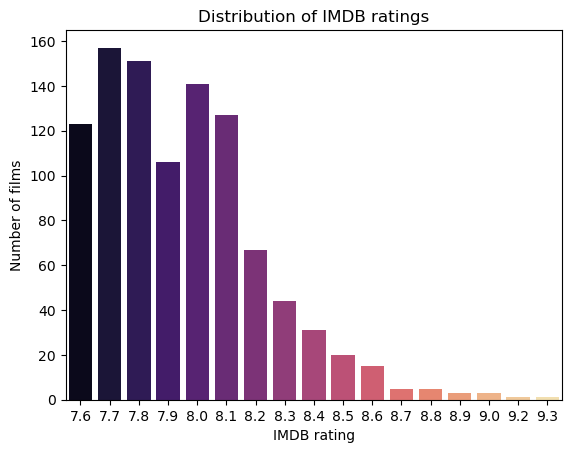

In [582]:
sns.countplot(x='IMDB_Rating', data = imdb_top_1000, palette="magma").set(title='Distribution of IMDB ratings',xlabel='IMDB rating', ylabel='Number of films');


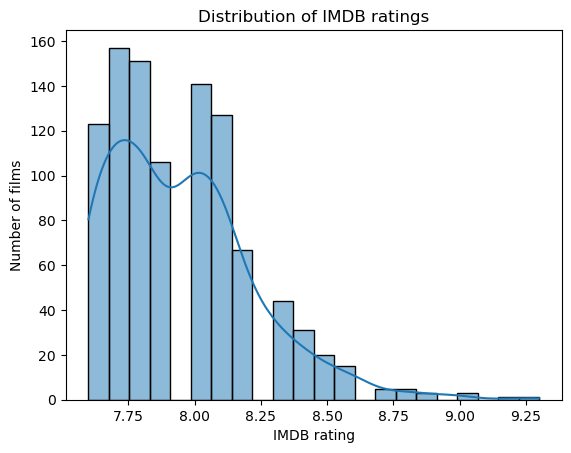

In [583]:
sns.histplot(x='IMDB_Rating', data = imdb_top_1000, kde=True).set(title='Distribution of IMDB ratings',xlabel='IMDB rating', ylabel='Number of films');


In [584]:
C = imdb_top_1000['IMDB_Rating'].mean()
m = imdb_top_1000['No_of_Votes'].min()
v = imdb_top_1000['No_of_Votes']
R = imdb_top_1000['IMDB_Rating']

In [585]:
imdb_top_1000['WR'] = (v / (v + m)) * R + (m / (v + m)) * C # Complete original dataset


To check if the weighted rating has worked, we display below the best rated movie. We observe that for an IMDB rating of 9/10, the weighted rating WR is better for movies with the most votes. We conclude that this weighted rating is more representative of a movie' success.

In [586]:
imdb_top_1000[['Series_Title','IMDB_Rating','WR','No_of_Votes']].sort_values('WR', ascending=False).head()

,Series_Title,IMDB_Rating,WR,No_of_Votes
0,The Shawshank Redemption,9.3,9.285691,2343110
1,The Godfather,9.2,9.180931,1620367
2,The Dark Knight,9.0,8.988679,2303232
3,The Godfather: Part II,9.0,8.977178,1129952
4,12 Angry Men,9.0,8.963129,689845


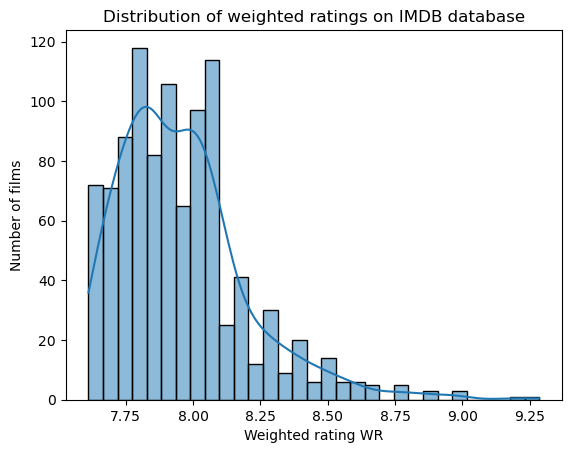

In [587]:
sns.histplot(x='WR', data = imdb_top_1000, kde=True).set(title='Distribution of weighted ratings on IMDB database',xlabel='Weighted rating WR', ylabel='Number of films');


### Merge IMDB database with movie database to have common features

In [588]:
len((imdb_top_1000['Series_Title'] + imdb_top_1000['Released_Year'].astype(str)).unique()) / len(imdb_top_1000)

1.0

In [589]:
# Remove duplicated movie with video game
movies.drop(movies[movies['wikipedia_id'] == 3184269].index, inplace=True)
# Fix duplicated movie with changing it release year to the correct one based on its wikipedia page
movies.loc[movies['wikipedia_id'] == 25357930, ['release_year']] = "2010"

In [590]:
movie_feature = imdb_top_1000.merge(movies, left_on=['Series_Title', 'Released_Year'], right_on=['name', 'release_year'], how='inner')

In [591]:
print(f'There are {movie_feature.shape[0]} common elements to both IMDB and Movie Corpus datasets. Knowing that IMDB includes {imdb_top_1000.shape[0]} elements and Movie corpus includes {movies.shape[0]}.')

There are 602 common elements to both IMDB and Movie Corpus datasets. Knowing that IMDB includes 1000 elements and Movie corpus includes 81740.


In [592]:
movie_feature.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'WR',
       'wikipedia_id', 'freebase_id', 'name', 'box_office_revenue', 'runtime',
       'languages', 'countries', 'genres', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

[Text(0.5, 1.0, 'Distribution of weighted ratings on merged database'),
 Text(0.5, 0, 'Weighted rating WR'),
 Text(0, 0.5, 'Number of films')]

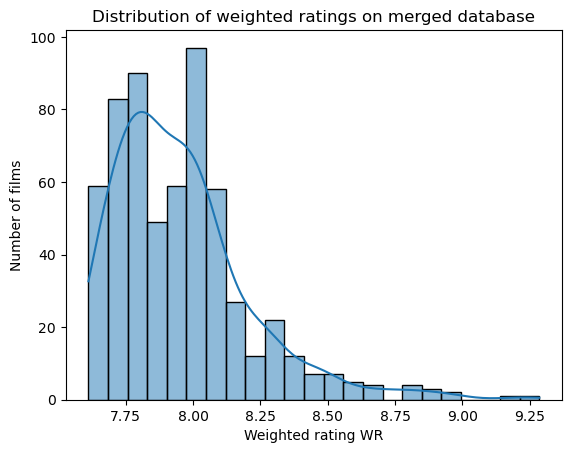

In [593]:
sns.histplot(x='WR', data=movie_feature, kde=True).set(title='Distribution of weighted ratings on merged database',xlabel='Weighted rating WR', ylabel='Number of films')


In [594]:
len((movie_feature['Series_Title'] + movie_feature['Released_Year'].astype(str)).unique()) / len(movie_feature)

1.0

### Fill missing budget data from imdb budget dataset

In [595]:
imdb_budget.sample(5)

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
3230,Let's Go to Prison,2006,6.0,R,84,"Comedy, Crime","Nov 17, 2006",4000000,4630045,4630045
2652,The Possession of Hannah Grace,2018,5.2,R,86,"Horror, Mystery, Thriller","Nov 28, 2018",6000000,14836174,42873730
3289,Warlock: The Armageddon,1993,5.4,R,98,"Action, Fantasy, Horror","Sep 24, 1993",3000000,3902679,3902679
1094,Burn After Reading,2008,7.0,R,96,"Comedy, Crime, Drama","Sep 12, 2008",37000000,60355347,168167798
245,Elf,2003,6.9,PG,97,"Comedy, Family, Fantasy","Nov 7, 2003",32000000,174626840,221464732


In [596]:
imdb_budget.describe()

,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross
count,3828.000000,3828.000000,3828.000000,3.828000e+03,3.828000e+03,3.828000e+03
mean,2003.594044,6.459013,109.940439,4.030960e+07,5.559021e+07,1.206910e+08
std,12.767740,0.996623,20.219674,4.480927e+07,7.403263e+07,1.993646e+08
min,1925.000000,1.500000,63.000000,7.000000e+03,0.000000e+00,0.000000e+00
25%,1999.000000,5.900000,96.000000,1.100000e+07,1.180967e+07,1.690363e+07
50%,2006.000000,6.500000,106.000000,2.500000e+07,3.225471e+07,5.077617e+07
75%,2013.000000,7.100000,120.000000,5.000000e+07,6.848642e+07,1.388776e+08
max,2020.000000,9.300000,271.000000,4.000000e+08,8.583730e+08,2.797801e+09


In [597]:
imdb_budget['Release Date'] = imdb_budget['Release Date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(pd.to_datetime(imdb_budget['Release Date']).apply(lambda x: [x.year, x.month, x.day]).tolist(), columns=['release_year','release_month','release_day'])
imdb_budget[['release_year','release_month','release_day']] = release_date

In [598]:
movie_feature['release_year'] = movie_feature['release_year'].replace('nan', np.nan).astype('float').astype('Int16')
movie_feature['release_month'] = movie_feature['release_month'].replace('nan', np.nan).astype('float').astype('Int16')
movie_feature['release_day'] = movie_feature['release_day'].replace('nan', np.nan).astype('float').astype('Int16')

In [599]:
imdb_budget['release_year'] = imdb_budget['release_year'].astype('Int16')
imdb_budget['release_month'] = imdb_budget['release_month'].astype('Int16')
imdb_budget['release_day'] = imdb_budget['release_day'].astype('Int16')

In [600]:
imdb_budget.drop(['Year', 'IMDb', 'Rating', 'Runtime', 'Release Date'], axis=1, inplace=True)
imdb_budget.rename({'Movie': 'name', 'Genre': 'genres'}, axis=1, inplace=True)
imdb_budget.columns

Index(['name', 'genres', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'release_year', 'release_month', 'release_day'],
      dtype='object')

In [601]:
imdb_budget.describe()

,Production Budget,Domestic Gross,Worldwide Gross,release_year,release_month,release_day
count,3.828000e+03,3.828000e+03,3.828000e+03,3828.000000,3828.000000,3828.000000
mean,4.030960e+07,5.559021e+07,1.206910e+08,2003.594044,7.322100,15.891066
std,4.480927e+07,7.403263e+07,1.993646e+08,12.767740,3.378479,8.437532
min,7.000000e+03,0.000000e+00,0.000000e+00,1925.000000,1.000000,1.000000
25%,1.100000e+07,1.180967e+07,1.690363e+07,1999.000000,5.000000,9.000000
50%,2.500000e+07,3.225471e+07,5.077617e+07,2006.000000,8.000000,16.000000
75%,5.000000e+07,6.848642e+07,1.388776e+08,2013.000000,10.000000,23.000000
max,4.000000e+08,8.583730e+08,2.797801e+09,2020.000000,12.000000,31.000000


In [602]:
movie_feature.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,WR,wikipedia_id,box_office_revenue,runtime,release_year,release_month,release_day
count,602.00000,602.000000,540.000000,6.020000e+02,5.180000e+02,602.000000,6.020000e+02,4.660000e+02,589.000000,602.000000,526.000000,513.000000
mean,123.39701,7.939867,78.014815,3.124322e+05,7.063559e+07,7.952846,4.521974e+06,1.498192e+08,123.719864,1984.528239,7.526616,15.173489
std,29.96493,0.283205,12.756161,3.608663e+05,9.826933e+07,0.256329,8.399796e+06,2.616961e+08,32.290581,22.487268,3.438473,8.390559
min,64.00000,7.600000,28.000000,2.593800e+04,3.296000e+03,7.611562,3.746000e+03,3.047100e+04,60.000000,1921.000000,1.000000,1.000000
25%,102.00000,7.700000,69.000000,6.796875e+04,7.994779e+06,7.768759,9.708125e+04,1.633354e+07,101.000000,1968.000000,5.000000,8.000000
50%,119.50000,7.900000,79.000000,1.747400e+05,3.564609e+07,7.908305,5.268845e+05,5.640697e+07,120.000000,1992.000000,8.000000,15.000000
75%,138.00000,8.100000,88.000000,4.194672e+05,8.972977e+07,8.076698,3.615865e+06,1.590565e+08,138.000000,2003.000000,10.000000,22.000000
max,321.00000,9.300000,100.000000,2.343110e+06,7.605076e+08,9.285691,3.692924e+07,2.782275e+09,330.000000,2014.000000,12.000000,31.000000


In [603]:
imdb_budget['genres'] = imdb_budget['genres'].apply(lambda x: x.split(', '))

In [604]:
movie_feature['release_month'] = movie_feature.set_index(['name', 'release_year'])['release_month'].fillna(imdb_budget.set_index(['name', 'release_year'])['release_month']).reset_index()['release_month']
movie_feature['release_day'] = movie_feature.set_index(['name', 'release_year', 'release_month'])['release_day'].fillna(imdb_budget.set_index(['name', 'release_year', 'release_month'])['release_day']).reset_index()['release_day']
movie_feature['genres'] = movie_feature.set_index(['name', 'release_year'])['genres'].fillna(imdb_budget.set_index(['name', 'release_year'])['genres']).reset_index()['genres']

In [605]:
movie_feature['release_year'] = movie_feature['release_year'].astype('float').astype('Int16')
movie_feature['release_month'] = movie_feature['release_month'].astype('float').astype('Int16')
movie_feature['release_day'] = movie_feature['release_day'].astype('float').astype('Int16')

In [606]:
movie_feature.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,WR,wikipedia_id,box_office_revenue,runtime,release_year,release_month,release_day
count,602.00000,602.000000,540.000000,6.020000e+02,5.180000e+02,602.000000,6.020000e+02,4.660000e+02,589.000000,602.000000,546.000000,534.000000
mean,123.39701,7.939867,78.014815,3.124322e+05,7.063559e+07,7.952846,4.521974e+06,1.498192e+08,123.719864,1984.528239,7.542125,15.074906
std,29.96493,0.283205,12.756161,3.608663e+05,9.826933e+07,0.256329,8.399796e+06,2.616961e+08,32.290581,22.487268,3.435789,8.436831
min,64.00000,7.600000,28.000000,2.593800e+04,3.296000e+03,7.611562,3.746000e+03,3.047100e+04,60.000000,1921.000000,1.000000,1.000000
25%,102.00000,7.700000,69.000000,6.796875e+04,7.994779e+06,7.768759,9.708125e+04,1.633354e+07,101.000000,1968.000000,5.000000,8.000000
50%,119.50000,7.900000,79.000000,1.747400e+05,3.564609e+07,7.908305,5.268845e+05,5.640697e+07,120.000000,1992.000000,8.000000,15.000000
75%,138.00000,8.100000,88.000000,4.194672e+05,8.972977e+07,8.076698,3.615865e+06,1.590565e+08,138.000000,2003.000000,11.000000,22.000000
max,321.00000,9.300000,100.000000,2.343110e+06,7.605076e+08,9.285691,3.692924e+07,2.782275e+09,330.000000,2014.000000,12.000000,31.000000


In [607]:
imdb_budget.drop(['release_month', 'release_day', 'genres'], axis=1, inplace=True)

In [608]:
len((movie_feature['name'] + str(movie_feature['release_year'])).unique()) / len(movie_feature)

1.0

In [609]:
movie_feature_with_budget = movie_feature.merge(imdb_budget, on=['name', 'release_year'], how='left')

In [610]:
movie_feature_with_budget.sample(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,runtime,languages,countries,genres,release_year,release_month,release_day,Production Budget,Domestic Gross,Worldwide Gross
90,https://m.media-amazon.com/images/M/MV5BMTU0NT...,Der Untergang,2004,R,156,"Biography, Drama, History",8.2,"Traudl Junge, the final secretary for Adolf Hi...",82.0,Oliver Hirschbiegel,...,178.0,"[Russian, German]","[Austria, Italy, Germany]","[Biography, World cinema, History, Drama, War ...",2004,9,8,NaN,NaN,NaN
539,https://m.media-amazon.com/images/M/MV5BYmM2ND...,Gone Baby Gone,2007,R,114,"Crime, Drama, Mystery",7.6,Two Boston area detectives investigate a littl...,72.0,Ben Affleck,...,114.0,[English],[United States of America],"[Thriller, Detective fiction, Detective, Psych...",2007,9,5,NaN,NaN,NaN
419,https://m.media-amazon.com/images/M/MV5BNzMxNT...,Wreck-It Ralph,2012,U,101,"Animation, Adventure, Comedy",7.7,A video game villain wants to be a hero and se...,72.0,Rich Moore,...,NaN,[English],[United States of America],"[Family Film, Comedy, Animation]",2012,11,1,165000000.0,189412677.0,496511521.0
301,https://m.media-amazon.com/images/M/MV5BMzc1YT...,Dawn of the Dead,1978,A,127,"Action, Adventure, Horror",7.9,Following an ever-growing epidemic of zombies ...,71.0,George A. Romero,...,128.0,[English],"[United States of America, Italy]","[Horror, Indie, Doomsday film, Cult, Splatter ...",1978,<NA>,<NA>,NaN,NaN,NaN
60,https://m.media-amazon.com/images/M/MV5BNWJlNz...,Amadeus,1984,R,160,"Biography, Drama, History",8.3,"The life, success and troubles of Wolfgang Ama...",88.0,Milos Forman,...,180.0,"[English, Italian, Latin, German]",[United States of America],"[Biography, Costume drama, Comedy-drama, Perio...",1984,9,6,18000000.0,51973029.0,51973029.0


In [611]:
movie_feature_with_budget['profit'] = movie_feature_with_budget['Worldwide Gross'] - movie_feature_with_budget['Production Budget']

In [612]:
movie_feature_with_budget.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,WR,wikipedia_id,box_office_revenue,runtime,release_year,release_month,release_day,Production Budget,Domestic Gross,Worldwide Gross,profit
count,602.00000,602.000000,540.000000,6.020000e+02,5.180000e+02,602.000000,6.020000e+02,4.660000e+02,589.000000,602.000000,546.000000,534.000000,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,123.39701,7.939867,78.014815,3.124322e+05,7.063559e+07,7.952846,4.521974e+06,1.498192e+08,123.719864,1984.528239,7.542125,15.074906,3.916562e+07,9.319951e+07,2.026368e+08,1.634712e+08
std,29.96493,0.283205,12.756161,3.608663e+05,9.826933e+07,0.256329,8.399796e+06,2.616961e+08,32.290581,22.487268,3.435789,8.436831,4.933714e+07,1.089083e+08,3.043748e+08,2.683048e+08
min,64.00000,7.600000,28.000000,2.593800e+04,3.296000e+03,7.611562,3.746000e+03,3.047100e+04,60.000000,1921.000000,1.000000,1.000000,1.140000e+05,0.000000e+00,0.000000e+00,-2.442435e+07
25%,102.00000,7.700000,69.000000,6.796875e+04,7.994779e+06,7.768759,9.708125e+04,1.633354e+07,101.000000,1968.000000,5.000000,8.000000,6.950000e+06,2.312462e+07,3.318465e+07,1.901315e+07
50%,119.50000,7.900000,79.000000,1.747400e+05,3.564609e+07,7.908305,5.268845e+05,5.640697e+07,120.000000,1992.000000,8.000000,15.000000,1.900000e+07,5.292917e+07,8.543452e+07,6.440737e+07
75%,138.00000,8.100000,88.000000,4.194672e+05,8.972977e+07,8.076698,3.615865e+06,1.590565e+08,138.000000,2003.000000,11.000000,22.000000,5.000000e+07,1.232280e+08,2.580878e+08,2.045151e+08
max,321.00000,9.300000,100.000000,2.343110e+06,7.605076e+08,9.285691,3.692924e+07,2.782275e+09,330.000000,2014.000000,12.000000,31.000000,2.600000e+08,7.605076e+08,2.788701e+09,2.551701e+09


In [613]:
movie_feature_with_budget[['name', 'Gross', 'box_office_revenue', 'Production Budget', 'Domestic Gross', 'Worldwide Gross', 'profit']].sample(5)

,name,Gross,box_office_revenue,Production Budget,Domestic Gross,Worldwide Gross,profit
497,Blazing Saddles,119500000.0,119500000.0,2600000.0,119500000.0,119500000.0,116900000.0
587,The Muppet Movie,76657000.0,76657000.0,8000000.0,76657000.0,76657000.0,68657000.0
542,Dead Man's Shoes,6013.0,NaN,NaN,NaN,NaN,NaN
361,Shrek,267665011.0,484409218.0,50000000.0,267655011.0,491812794.0,441812794.0
171,Mr. Smith Goes to Washington,9600000.0,9000000.0,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Distribution of the difference of gross data from the two datasets'}, ylabel='Frequency'>

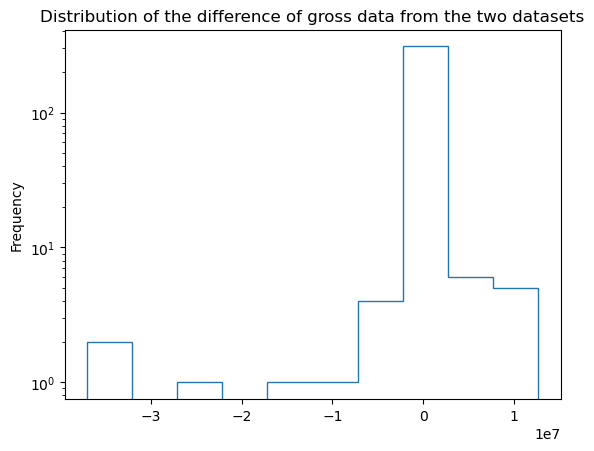

In [614]:
(movie_feature_with_budget['Gross'] - movie_feature_with_budget['Domestic Gross']).plot(kind='hist', logy=True, histtype='step', title='Distribution of the difference of gross data from the two datasets')

Looking better at our merged datasets, we see we have 4 types of gross revenue: box_office_revenue, Domestic gross, Worldwide Gross and Gross. Looking better at the definition of each of those, we see that both gross and domestic gross are fairly similar except for some outliars and both correspond to the movie revenue in the few days following release. On the other hand, box office revenue is the same as Worldwide gross and corresponds to overall revenue for all time. We will thus focus on the latter to evaluate profitability successfulness. 

## Account for inflation: 

Source: https://inflationdata.com/Inflation/Inflation/DecadeInflation.asp

In [615]:
# Create dictionary of cumulative inflation rate per decade since 1913 in the US:
inflation_rates = [92.86, 4.82, -18.6, 68.57, 24.58, 28.23, 103.45, 64.41, 33.47, 28.31, 19.38, 1.27]
inflation_rates = [x / 100 + 1 for x in inflation_rates]
decades = list(np.linspace(1913,2023,len(inflation_rates)))
inflation_dic = dict(map(lambda i,j : (i,j) , decades, inflation_rates))

In [616]:
df = movie_feature_with_budget.copy()

In [617]:
# Initialisation
df['profit_modified'] = df['profit']
df['box_office_revenue_modified'] = df['box_office_revenue']
df['Domestic Gross_modified'] = df['Domestic Gross']
df['Worldwide Gross_modified'] = df['Worldwide Gross']
df['Gross_modified'] = df['Gross']

In [618]:
for k in range(len(decades)-1): # For each decade
    year_before = decades[k]
    year = decades[k+1]
    inflation_rate = inflation_dic[year_before]
    
    decade_df = df[(df['release_year']<year) & (df['release_year']>year_before)] # decade mask
    
    idx = decade_df.index.tolist()

    # Create new column with prices modified by interest rate
    df.loc[idx, 'profit_modified'] = decade_df['profit'] * inflation_rate
    df.loc[idx, 'box_office_revenue_modified'] = decade_df['box_office_revenue'] * inflation_rate
    df.loc[idx, 'Domestic Gross_modified'] = decade_df['Domestic Gross'] * inflation_rate
    df.loc[idx, 'Worldwide Gross_modified'] = decade_df['Worldwide Gross'] * inflation_rate
    df.loc[idx, 'Gross_modified'] = decade_df['Gross'] * inflation_rate
   

In [619]:
movie_feature_with_budget = df.copy()

In [620]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,release_day,Production Budget,Domestic Gross,Worldwide Gross,profit,profit_modified,box_office_revenue_modified,Domestic Gross_modified,Worldwide Gross_modified,Gross_modified
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,10,25000000.0,28241469.0,2.841706e+07,3.417060e+06,4.560750e+06,3.782736e+07,3.769389e+07,3.792825e+07,3.782736e+07
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,15,7000000.0,134966411.0,2.685000e+08,2.615000e+08,3.353214e+08,3.442976e+08,1.730674e+08,3.442976e+08,1.730674e+08
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,16,185000000.0,533720947.0,1.000743e+09,8.157428e+08,1.046680e+09,1.288949e+09,6.848173e+08,1.284053e+09,6.862769e+08
3,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,10,340000.0,0.0,0.000000e+00,-3.400000e+05,-4.235720e+05,1.245800e+06,0.000000e+00,0.000000e+00,5.431688e+06
4,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,...,17,94000000.0,377845905.0,1.120224e+09,1.026224e+09,1.026224e+09,1.119930e+09,3.778459e+08,1.120224e+09,3.778459e+08


### Wikipedia pageviews

In [621]:
wikipedia_pageviews['date'] = pd.to_datetime(wikipedia_pageviews['date'], format='%Y%m%d%H')

In [622]:
wikipedia_pageviews.sample(5)

,movie_name,date,pageviews
630160,Crocodile Dundee,2019-04-19,777
506828,A Quiet Place,2020-01-31,112
695510,Meet the Parents,2019-06-28,940
699498,2012,2015-08-26,485
1055636,Lara Croft: Tomb Raider,2020-06-21,5138


In [623]:
wikipedia_pageviews.describe()

,pageviews
count,2.301748e+06
mean,1.688527e+03
std,6.576590e+03
min,0.000000e+00
25%,1.170000e+02
50%,8.810000e+02
75%,1.891000e+03
max,1.982874e+06


In [624]:
wikipedia_pageviews.rename({'movie_name': 'name'}, axis=1, inplace=True)

In [625]:
wikipedia_pageviews_mean_per_day = wikipedia_pageviews.groupby('name').mean()
movie_feature_with_budget_and_wikipedia_pageviews = pd.merge(movie_feature_with_budget, wikipedia_pageviews_mean_per_day, on='name', how='left')

In [626]:
movie_feature_with_budget_and_wikipedia_pageviews.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,WR,wikipedia_id,box_office_revenue,runtime,release_year,...,Production Budget,Domestic Gross,Worldwide Gross,profit,profit_modified,box_office_revenue_modified,Domestic Gross_modified,Worldwide Gross_modified,Gross_modified,pageviews
count,602.00000,602.000000,540.000000,6.020000e+02,5.180000e+02,602.000000,6.020000e+02,4.660000e+02,589.000000,602.000000,...,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,4.660000e+02,3.390000e+02,3.390000e+02,5.180000e+02,149.000000
mean,123.39701,7.939867,78.014815,3.124322e+05,7.063559e+07,7.952846,4.521974e+06,1.498192e+08,123.719864,1984.528239,...,3.916562e+07,9.319951e+07,2.026368e+08,1.634712e+08,2.181029e+08,2.028551e+08,1.263150e+08,2.696844e+08,9.677574e+07,2147.434006
std,29.96493,0.283205,12.756161,3.608663e+05,9.826933e+07,0.256329,8.399796e+06,2.616961e+08,32.290581,22.487268,...,4.933714e+07,1.089083e+08,3.043748e+08,2.683048e+08,3.471738e+08,3.431289e+08,1.428364e+08,3.921517e+08,1.323253e+08,1998.278442
min,64.00000,7.600000,28.000000,2.593800e+04,3.296000e+03,7.611562,3.746000e+03,3.047100e+04,60.000000,1921.000000,...,1.140000e+05,0.000000e+00,0.000000e+00,-2.442435e+07,-4.015608e+07,3.500000e+04,0.000000e+00,0.000000e+00,4.399171e+03,4.214929
25%,102.00000,7.700000,69.000000,6.796875e+04,7.994779e+06,7.768759,9.708125e+04,1.633354e+07,101.000000,1968.000000,...,6.950000e+06,2.312462e+07,3.318465e+07,1.901315e+07,2.585947e+07,2.058911e+07,3.024133e+07,4.559592e+07,1.016832e+07,405.828571
50%,119.50000,7.900000,79.000000,1.747400e+05,3.564609e+07,7.908305,5.268845e+05,5.640697e+07,120.000000,1992.000000,...,1.900000e+07,5.292917e+07,8.543452e+07,6.440737e+07,8.435435e+07,8.108526e+07,7.401080e+07,1.241392e+08,4.843635e+07,1826.232282
75%,138.00000,8.100000,88.000000,4.194672e+05,8.972977e+07,8.076698,3.615865e+06,1.590565e+08,138.000000,2003.000000,...,5.000000e+07,1.232280e+08,2.580878e+08,2.045151e+08,2.761420e+08,2.271561e+08,1.687244e+08,3.522460e+08,1.311791e+08,3293.702783
max,321.00000,9.300000,100.000000,2.343110e+06,7.605076e+08,9.285691,3.692924e+07,2.782275e+09,330.000000,2014.000000,...,2.600000e+08,7.605076e+08,2.788701e+09,2.551701e+09,3.274088e+09,3.569937e+09,9.758073e+08,3.578183e+09,9.758073e+08,11041.264935


### Investigate the gross difference between the original and the imdb budget datasets

<AxesSubplot:title={'center':'Distribution of the difference of the gross data from the two datasets'}, ylabel='Frequency'>

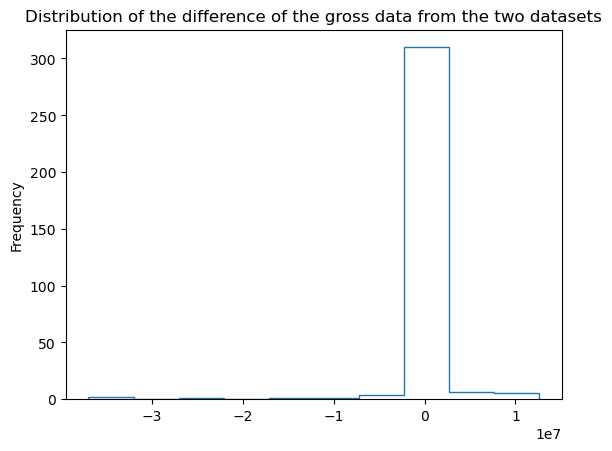

In [627]:
(movie_feature_with_budget['Gross'] - movie_feature_with_budget['Domestic Gross']).plot(kind='hist', histtype='step', title='Distribution of the difference of the gross data from the two datasets')

<AxesSubplot:title={'center':'Distribution of the difference of the gross data from the two datasets'}, ylabel='Frequency'>

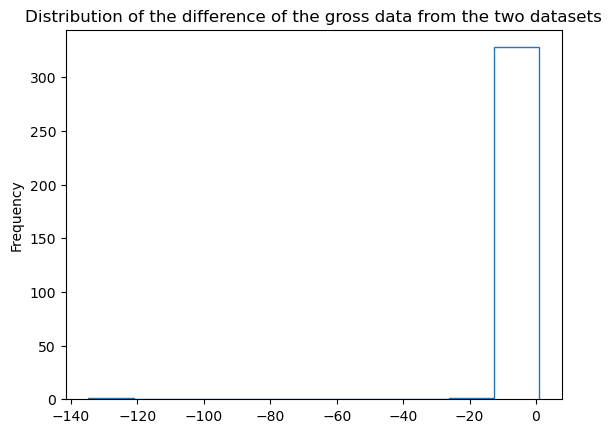

In [628]:
((movie_feature_with_budget['Gross'] - movie_feature_with_budget['Domestic Gross']) / movie_feature_with_budget['Gross']).plot(kind='hist', histtype='step', title='Distribution of the difference of the gross data from the two datasets')

<AxesSubplot:title={'center':'Distribution of the difference of the total gross data from the two datasets'}, ylabel='Frequency'>

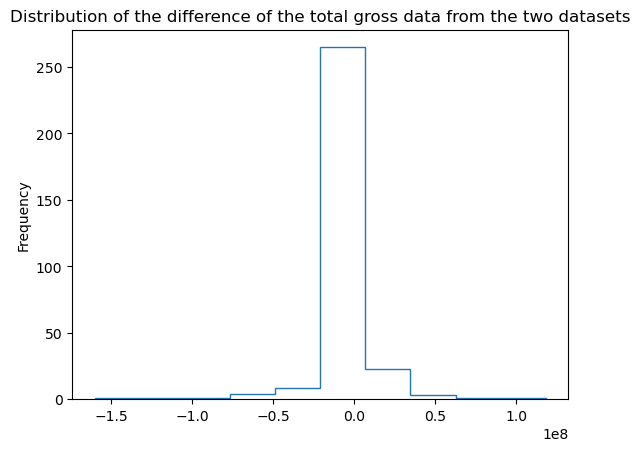

In [629]:
(movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']).plot(kind='hist', histtype='step', title='Distribution of the difference of the total gross data from the two datasets')

In [630]:
movie_feature_with_budget_differences = movie_feature_with_budget.copy()
movie_feature_with_budget_differences['gross_difference'] = np.abs(movie_feature_with_budget_differences['Gross'] - movie_feature_with_budget_differences['Domestic Gross'])
movie_feature_with_budget_differences['gross_difference%'] = ((np.abs(movie_feature_with_budget['Gross'] - movie_feature_with_budget['Domestic Gross']) / movie_feature_with_budget['Gross']) * 100).round(2)

In [631]:
movie_feature_with_budget_differences \
    [(movie_feature_with_budget_differences['gross_difference'] != 0) & (~movie_feature_with_budget_differences['gross_difference'].isna())] \
    .sort_values('gross_difference', ascending=False) \
    [['name', 'Gross', 'box_office_revenue', 'Production Budget', 'Domestic Gross', 'Worldwide Gross', 'profit', 'gross_difference']]

,name,Gross,box_office_revenue,Production Budget,Domestic Gross,Worldwide Gross,profit,gross_difference
591,Close Encounters of the Third Kind,132088635.0,337700000.0,20000000.0,169100479.0,340800479.0,320800479.0,37011844.0
261,The Wizard of Oz,2076020.0,3017000.0,2777000.0,34685891.0,34949482.0,32172482.0,32609871.0
501,The French Connection,15630710.0,51700000.0,2200000.0,41158757.0,41158757.0,38958757.0,25528047.0
321,Notorious,10464000.0,NaN,2000000.0,24464742.0,24492698.0,22492698.0,14000742.0
213,Beauty and the Beast,218967620.0,424967620.0,20000000.0,206333165.0,438707031.0,418707031.0,12634455.0
...,...,...,...,...,...,...,...,...
232,Butch Cassidy and the Sundance Kid,102308889.0,102308889.0,6000000.0,102308900.0,102310653.0,96310653.0,11.0
214,Dances with Wolves,184208848.0,424208848.0,19000000.0,184208842.0,424208842.0,405208842.0,6.0
475,Malcolm X,48169908.0,48169910.0,35000000.0,48169910.0,48169910.0,13169910.0,2.0
116,How to Train Your Dragon,217581231.0,494878759.0,165000000.0,217581232.0,494870992.0,329870992.0,1.0


In [632]:
movie_feature_with_budget_differences \
    [(movie_feature_with_budget_differences['gross_difference%'] != 0) & (~movie_feature_with_budget_differences['gross_difference%'].isna())] \
    .sort_values('gross_difference%', ascending=False) \
    [['name', 'Gross', 'box_office_revenue', 'Production Budget', 'Domestic Gross', 'Worldwide Gross', 'profit', 'gross_difference', 'gross_difference%']]

,name,Gross,box_office_revenue,Production Budget,Domestic Gross,Worldwide Gross,profit,gross_difference,gross_difference%
307,Night of the Living Dead,89029.0,4.200000e+07,114000.0,12087064.0,3.008706e+07,2.997306e+07,11998035.0,13476.55
261,The Wizard of Oz,2076020.0,3.017000e+06,2777000.0,34685891.0,3.494948e+07,3.217248e+07,32609871.0,1570.79
501,The French Connection,15630710.0,5.170000e+07,2200000.0,41158757.0,4.115876e+07,3.895876e+07,25528047.0,163.32
321,Notorious,10464000.0,NaN,2000000.0,24464742.0,2.449270e+07,2.249270e+07,14000742.0,133.80
3,12 Angry Men,4360000.0,1.000000e+06,340000.0,0.0,0.000000e+00,-3.400000e+05,4360000.0,100.00
...,...,...,...,...,...,...,...,...,...
354,The Count of Monte Cristo,54234062.0,7.539505e+07,40000000.0,54228104.0,7.538909e+07,3.538909e+07,5958.0,0.01
457,"O Brother, Where Art Thou?",45512588.0,7.186833e+07,26000000.0,45506619.0,7.576381e+07,4.976381e+07,5969.0,0.01
362,Titanic,659325379.0,2.185372e+09,200000000.0,659363944.0,2.208208e+09,2.008208e+09,38565.0,0.01
378,Glory,26830000.0,2.682836e+07,18000000.0,26828365.0,2.682836e+07,8.828365e+06,1635.0,0.01


Gross data for Close Encounters of the Third Kind from Wikipedia
 * box-office: 306.1M

# Exploratory Data Analysis

## Success indicators

Success of a movie can be very subjective. We thus need to diversify our definitions of success to have a holistic view of our dataset. The following success indicators are considered: 
- How well a movie is received: 
    IMDB ratings which should be weighted by the number of votes
- How profitable a movie is: 
    Overall gross revenue of the movie OR profit = gross revenue - budget spent
- How long a movie will last in time: 
    Number of connection to the movie wikipedia page


## Explore data

Looking at the impacts of features on eachother by drawing a correlation heatmap

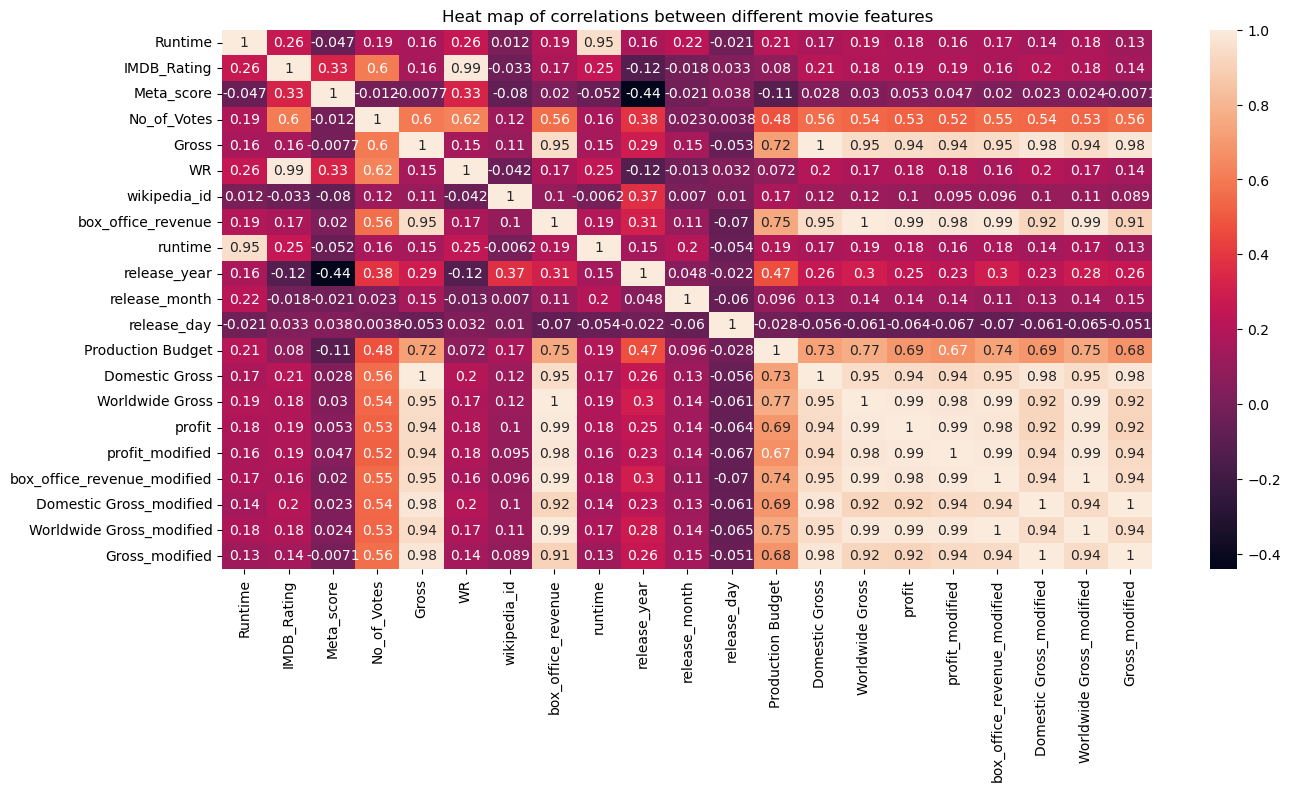

In [633]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(movie_feature_with_budget.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');


Success indicators: 

- IMDB rating -> weighted rating : WR 
- gross revenue (15000 types) 
- wikipedia ID connection query : how much a movie lasts in time
- profit = revenue - budget 

1. correlation btw success indicators 
2. Check if we have the same successful movies & actors according to different indicators
3. Succesfulness = function (all indicators) 



Actor success: 
Weight in terms of number of apparearance and movie WR

### Impact of release date on success

To assess the impact of release date on success, we need to use the information on 'release_month' for each movie and need to choose a feature for success which can be either the IMDB weighted rating 'WR' or the 'box_office_revenue'. Since 'WR' and 'release_month' are features coming from two different datasets, we need to use the merged dataframe movie_feature which contains only 875. We can then compare the results found with ('WR','release_month') to ('box_office_revenue','release_month') which is based on much more data: 81741. 

-> CAREFUL, WHY ARE RATINGS AND GROSS REVENUE COMPLETELY UNCORRELATED ? 

In [634]:
df_release = movie_feature.dropna(how='all', subset=['release_month']) # Remove NaN months

In [635]:
movies['release_month'].describe()

count     42666
unique       12
top          09
freq       4268
Name: release_month, dtype: object

In [636]:
df_release.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'WR',
       'wikipedia_id', 'freebase_id', 'name', 'box_office_revenue', 'runtime',
       'languages', 'countries', 'genres', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [637]:
df_release=df_release.sort_values(by='release_month', ascending=True)

Text(0.5, 1.0, 'Successfulness of Movie Release By Month')

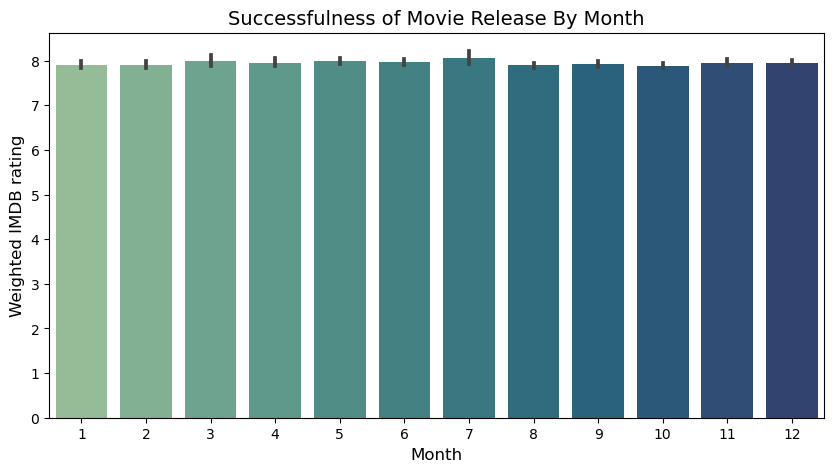

In [638]:
# Plot
plt.figure(figsize=(10,5))
ax7 = sns.barplot(x="release_month", y="WR",data=df_release,palette='crest')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Weighted IMDB rating', fontsize=12)
plt.title('Successfulness of Movie Release By Month', fontsize=14)

In [640]:
df_release.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'WR',
       'wikipedia_id', 'freebase_id', 'name', 'box_office_revenue', 'runtime',
       'languages', 'countries', 'genres', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [639]:
# Plot
plt.figure(figsize=(10,5))
ax7 = sns.barplot(x="release_month", y="box_office_revenue_modified",data=df_release,palette='crest')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Box office revenue', fontsize=12)
plt.title('Successfulness in terms of box office revenue of Movie Release By Month', fontsize=14)

ValueError: Could not interpret input 'box_office_revenue_modified'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Plot
plt.figure(figsize=(10,5))
ax7 = sns.barplot(x="release_month", y="Gross_modified",data=df_release,palette='crest')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Gross revenue', fontsize=12)
plt.title('Successfulness in terms of gross revenue of Movie Release By Month', fontsize=14)

## What budget should be spent on a successful movie?

To see what budget should be spent on a successful movie, we want to compare maintly three features, the budget spent 'Production Budget', the profit made 'profit' and the rating of the movie to account for successfulness.

CHECK FOR SUCCESSFULNESS. 

As our movie database has movies dating back to 1921, we need to adjust the budgets and profits through an inflation rate

In [ ]:
movie_feature_with_budget.columns

In [ ]:
min(movie_feature_with_budget['Released_Year'])

In [ ]:
sns.jointplot(data=movie_feature_with_budget, x='Production Budget', y='profit_modified', kind="reg");



To do : Split between high budget movies and average budget and check same graph 

The positive trend line indicates that an increase in the budget will result in an increase in profit.

In [ ]:
sns.jointplot(data=movie_feature_with_budget, x='Production Budget', y='profit_modified', kind="hex");


In [ ]:
sns.pairplot(movie_feature_with_budget[['Production Budget','profit','WR']])

In [ ]:
Top20_ProfitableMovies = movie_feature_with_budget.sort_values('profit', ascending=False).head(20)

Profit margin 

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=Top20_ProfitableMovies['Series_Title'],y=Top20_ProfitableMovies['profit'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Series_Title'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 20 Most Profitable Movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)

## Impact of director

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['profit'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Directors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)

In [ ]:
Top20_ProfitableMovies['Director']

## Impact of actors

HOW TO ACCOUNT FOR DIFFERENT ACTORS ??? only Star1

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['profit'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Actors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)

## Popular features in characters

Characters dataset splitted in males and females to easily compare among genders

In [ ]:
characters_male = characters[characters['actor_gender'] == 'M']
characters_female = characters[characters['actor_gender'] == 'F']

In [ ]:
def characters_height_histogram(characters, bins):
    LIMIT_CHILDREN_AGE = 14
    characters_height = characters.dropna(subset=['actor_height_meters'])
    characters_height = characters_height[(characters_height['actor_age_at_movie_release'] > LIMIT_CHILDREN_AGE)]
    plt.hist(characters_height['actor_height_meters'],bins=bins, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Adult actor height (m)')
    plt.title('Height distribution of adult actors')

characters_height_histogram(characters_male, bins=40)
characters_height_histogram(characters_female, bins=25)

In [ ]:
def characters_age_histogram(characters):
    characters_age = characters.dropna(subset=['actor_age_at_movie_release']).sort_values(by=['actor_age_at_movie_release'])
    characters_age = characters_age[characters_age['actor_age_at_movie_release'] > 0]
    plt.hist(characters_age['actor_age_at_movie_release'], bins=45, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Actor age at movie release')
    plt.title('Age at movie release distribution of actors')

characters_age_histogram(characters_male)
characters_age_histogram(characters_female)

## What genres are the most profitable?

In [ ]:
movie_feature_with_budget['profit'] = movie_feature_with_budget['Worldwide Gross'] - movie_feature_with_budget['Production Budget']

In [ ]:
movie_feature_with_budget['profit'].plot(kind='hist', logy=True, histtype='step', title='Movie profit distribution')

In [ ]:
movie_feature_with_budget['genre1'] = movie_feature_with_budget['genres'].apply(lambda el: el[0])

In [ ]:
movie_feature_with_budget['genre1'].value_counts().plot(kind='bar', title='Movie genres distribution')

In [ ]:
def visualize_genres_profit(genres, means, p025s, p975s, axis, title):
    axis.errorbar(
        np.arange(len(genres)),
        means,
        xerr=0.5,
        yerr=[means - p025s, p975s - means],
        linestyle='', alpha=0.7, color='teal'
    )

    axis.set_title(title)
    print(genres)
    ax.set_xticks(np.arange(len(genres)))
    axis.xaxis.set_major_locator(plt.FixedLocator(np.arange(len(genres))))
    axis.set_xticklabels(genres, rotation=90)


In [ ]:
def calculate_average_difference_95_ci(data):
    average_difference = np.mean(data)
    ci_95 = np.percentile(data, [2.5, 97.5])

    return average_difference, ci_95

In [ ]:
profit = movie_feature_with_budget.groupby('genre1').agg({'profit': calculate_average_difference_95_ci})['profit']

profit_mean = profit.str[0]
profit_p025 = profit.str[1].str[0]
profit_p975 = profit.str[1].str[1]

figure, axis = plt.subplots(1, 1)
visualize_genres_profit(profit_mean.index, profit_mean, profit_p025, profit_p975, axis, 'Average profit per genre')

## correlation between the choice of topics and movie profitability can be investigated

In [ ]:
movie_feature_with_budget['genre1_category'] = movie_feature_with_budget['genre1'].astype('category').cat.codes

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(movie_feature_with_budget.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');

## Clustering between movies: Classics VS forgettable : check with wikipedia ID how much it is visited : time series of access 

In [ ]:
wikipedia_pageviews.sample(5)

In [ ]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Spy Kids'].plot(x='date', y='pageviews', title='Pageviews for Spy Kids')

In [ ]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Avengers: Endgame'].plot(x='date', y='pageviews', logy=True, title='Pageviews for Avengers: Endgame')

In [ ]:
movie_feature_with_budget_and_wikipedia_pageviews.sample(5)

In [ ]:
movie_feature_with_budget_and_wikipedia_pageviews.columns

In [ ]:
movie_feature_with_budget_and_wikipedia_pageviews['release_year'] = movie_feature_with_budget_and_wikipedia_pageviews['release_year'].astype(int)

In [ ]:
mod = smf.ols(formula='pageviews ~ release_year + runtime + WR + Director + Star1 + Star2 + Star3 + Star4 + Gross + profit + genre1', data=movie_feature_with_budget_and_wikipedia_pageviews[movie_feature_with_budget_and_wikipedia_pageviews['release_year'] < (2015-15)])
np.random.seed(2)
res = mod.fit()
res.summary()